<a href="https://colab.research.google.com/github/JSunOO/AIB09_Discussion/blob/master/section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
#결측치 개수 확인
pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"])

In [75]:
# 결측치 0으로 변환
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.fillna(0, inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [76]:
# M, K 가 들어간 문자열 제거
drop_MK = ['M','K']
df = df[~df['NA_Sales'].str.contains('|'.join(drop_MK))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_MK))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_MK))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_MK))]
df.iloc[9]

Name           The Penguins of Madagascar: Dr. Blowhole Retur...
Platform                                                     PS3
Year                                                        2011
Genre                                                     Action
Publisher                                                    THQ
NA_Sales                                                    0.04
EU_Sales                                                    0.03
JP_Sales                                                       0
Other_Sales                                                 0.01
Name: 9, dtype: object

In [50]:
#df type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15813 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         15813 non-null  object
 1   Platform     15813 non-null  object
 2   Year         15813 non-null  int64 
 3   Genre        15813 non-null  object
 4   Publisher    15813 non-null  object
 5   NA_Sales     15813 non-null  object
 6   EU_Sales     15813 non-null  object
 7   JP_Sales     15813 non-null  object
 8   Other_Sales  15813 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [77]:
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15813.000000,15813.000000,15813.000000,15813.000000,15813.000000
mean,1962.368052,0.262737,0.145487,0.077119,0.048146
std,293.633736,0.817513,0.506543,0.308153,0.191448
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000
max,2017.000000,41.490000,29.020000,10.220000,10.570000


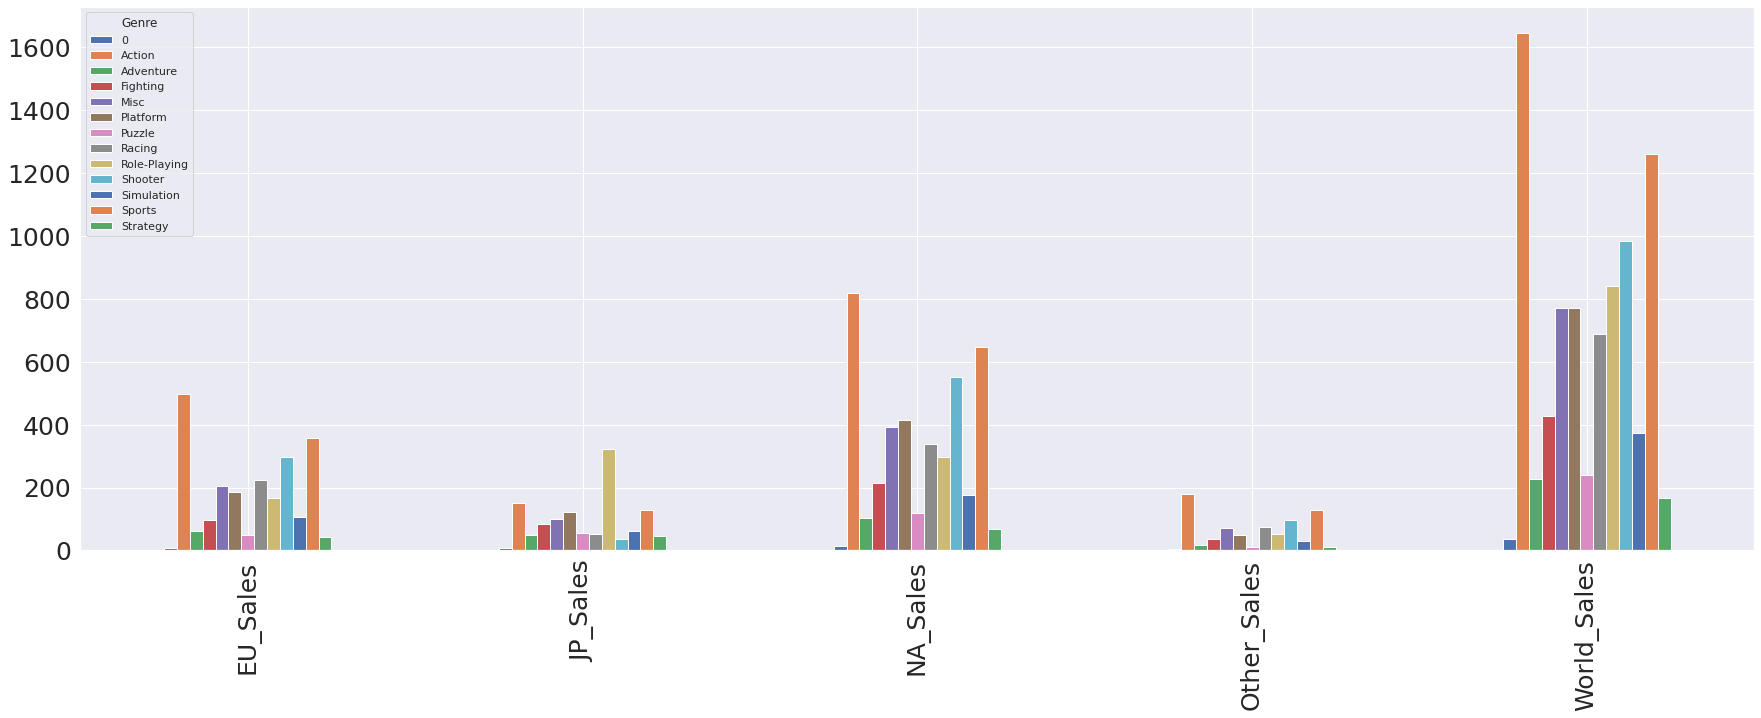

In [104]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# 전세계 열feature 추가 
df['World_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

# 전세계 게임 장르 선호도
df_genre = df.groupby(by=['Genre'])['World_Sales'].sum()
df_genre = df_genre.reset_index()
# 북미 ;;
df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum()
df_genre_na = df_genre_na.reset_index()
# 유럽 ;;
df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum()
df_genre_eu = df_genre_eu.reset_index()
# 일본 ;;
df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum()
df_genre_jp = df_genre_jp.reset_index()
# 기타 지역 ;;
df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum()
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")
df_genre.transpose().plot(kind='bar',figsize=(30,10),fontsize=25)